In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 
from scipy.stats import norm 
from sklearn.preprocessing import StandardScaler 
from scipy import stats 
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline
import gc

In [2]:
train_df = pd.read_csv('preprocessing_DataFrame_train_fin.csv')
test_df = pd.read_csv('preprocessing_DataFrame_test_fin.csv')

In [4]:
train_df.head()

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,-0.188358,-0.187376,0.672471,-0.476076,1.150705,0.903723,1.218824,1.109464,-0.194812,...,False,False,False,False,True,False,False,False,True,False
1,2,0.556509,0.082782,-0.040779,2.010117,0.006958,-0.582980,-0.827538,-0.654480,-0.194812,...,False,False,False,False,True,False,False,False,True,False
2,3,-0.035561,0.432610,0.672471,-0.476076,1.054325,0.836915,1.180719,1.109464,-0.194812,...,False,False,False,False,True,False,False,False,True,False
3,4,-0.447832,0.071532,0.672471,-0.476076,-1.627818,-0.836999,-0.827538,-0.654480,-0.194812,...,False,False,False,False,True,False,False,False,False,False
4,5,0.747777,0.985997,1.361051,-0.476076,1.006892,0.706341,1.325141,1.109464,-0.194812,...,False,False,False,False,True,False,False,False,True,False


In [5]:
test_df.head()

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,0.586284,0.528189,-0.739109,0.420405,-0.501416,-1.100544,-0.808977,-0.639366,-0.182939,...,False,False,False,False,True,False,False,False,True,False
1,1462,0.632551,1.012427,-0.030781,0.420405,-0.592669,-1.201416,1.131395,-0.639366,-0.182939,...,False,False,False,False,True,False,False,False,True,False
2,1463,0.304998,0.936778,-0.739109,-0.479861,0.855278,0.622274,-0.808977,-0.639366,-0.182939,...,False,False,False,False,True,False,False,False,True,False
3,1464,0.493236,0.189212,-0.030781,0.420405,0.900854,0.622274,0.695017,-0.639366,-0.182939,...,False,False,False,False,True,False,False,False,True,False
4,1465,-1.277585,-1.143126,1.319504,-0.479861,0.634472,0.271712,-0.808977,1.070583,-0.182939,...,False,False,False,False,True,False,False,False,True,False


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Assuming 'SalePrice' is the target variable in the train dataset
X = train_df.drop(columns=['SalePrice', 'Id'])
y = train_df['SalePrice']

# Split the train data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Ridge Regression Model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# Predicting on validation set
y_val_pred_ridge = ridge_model.predict(X_val)

# Calculating Mean Squared Error for Ridge Model
mse_ridge = mean_squared_error(y_val, y_val_pred_ridge)
mse_ridge

0.09007496016615574

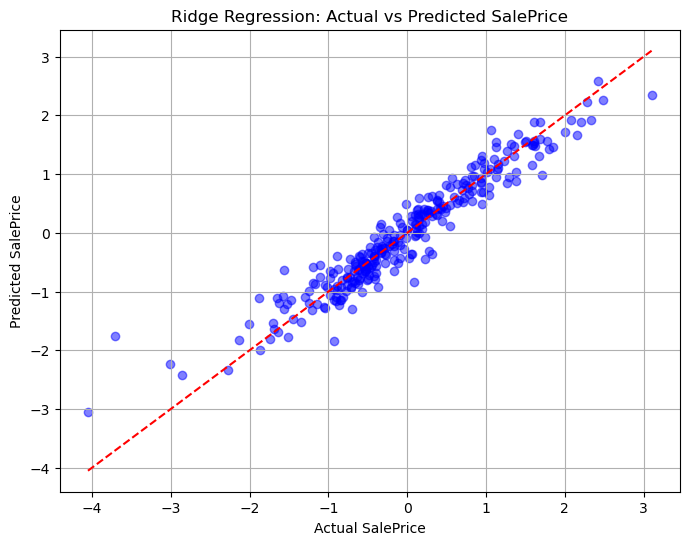

In [15]:
# Ridge 모델의 실제 값과 예측 값을 시각화
plt.figure(figsize=(8, 6))
plt.scatter(y_val, y_val_pred_ridge, color='blue', alpha=0.5)
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red', linestyle='--')
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Ridge Regression: Actual vs Predicted SalePrice")
plt.grid(True)
plt.show()


In [7]:
from sklearn.linear_model import Lasso

# Lasso Regression Model
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)

# Predicting on validation set
y_val_pred_lasso = lasso_model.predict(X_val)

# Calculating Mean Squared Error for Lasso Model
mse_lasso = mean_squared_error(y_val, y_val_pred_lasso)
mse_lasso

0.17142348060705329

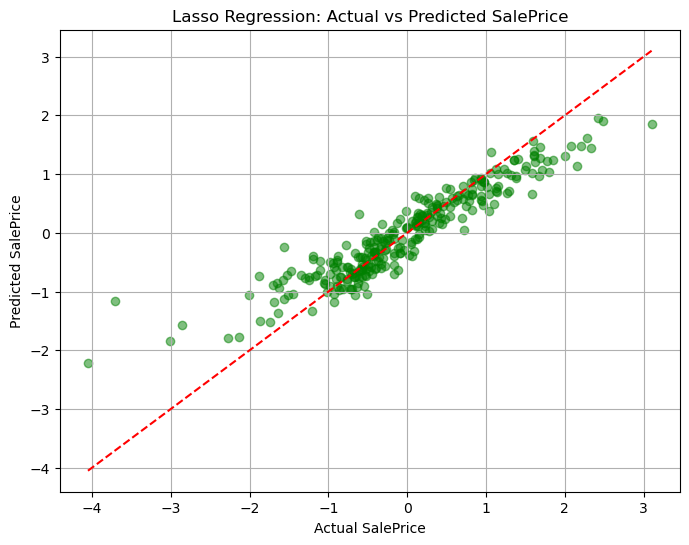

In [13]:
plt.figure(figsize=(8, 6))
plt.scatter(y_val, y_val_pred_lasso, color='green', alpha=0.5)
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red', linestyle='--')
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Lasso Regression: Actual vs Predicted SalePrice")
plt.grid(True)
plt.show()

In [8]:
import xgboost as xgb

# XGBoost Model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)

# Predicting on validation set
y_val_pred_xgb = xgb_model.predict(X_val)

# Calculating Mean Squared Error for XGBoost Model
mse_xgb = mean_squared_error(y_val, y_val_pred_xgb)
mse_xgb

0.136394855667738

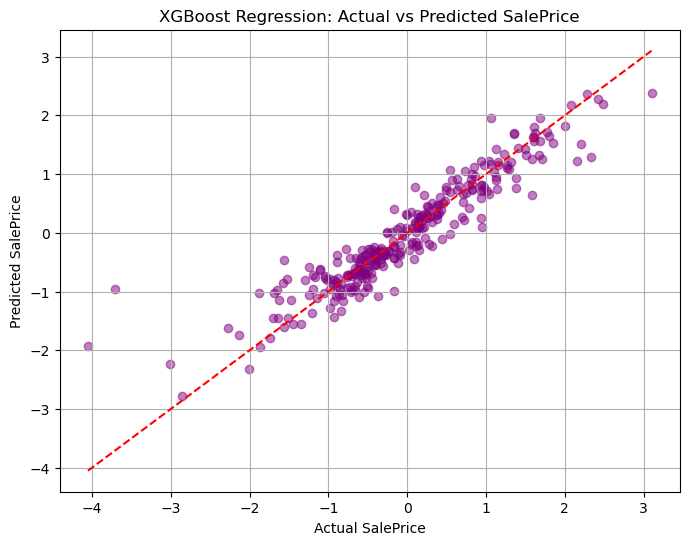

In [14]:
plt.figure(figsize=(8, 6))
plt.scatter(y_val, y_val_pred_xgb, color='purple', alpha=0.5)
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red', linestyle='--')
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("XGBoost Regression: Actual vs Predicted SalePrice")
plt.grid(True)
plt.show()

In [9]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [10]:
from sklearn.linear_model import ElasticNetCV
from lightgbm import LGBMRegressor

# ElasticNetCV Model
elasticnetcv_model = ElasticNetCV(cv=5, random_state=42)
elasticnetcv_model.fit(X_train, y_train)

# Predicting on validation set
y_val_pred_elasticnetcv = elasticnetcv_model.predict(X_val)

# Calculating Mean Squared Error for ElasticNetCV Model
mse_elasticnetcv = mean_squared_error(y_val, y_val_pred_elasticnetcv)

# LightGBM Model
lgbm_model = LGBMRegressor(random_state=42)
lgbm_model.fit(X_train, y_train)

# Predicting on validation set
y_val_pred_lgbm = lgbm_model.predict(X_val)

# Calculating Mean Squared Error for LightGBM Model
mse_lgbm = mean_squared_error(y_val, y_val_pred_lgbm)

mse_elasticnetcv, mse_lgbm


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000594 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2522
[LightGBM] [Info] Number of data points in the train set: 1164, number of used features: 146
[LightGBM] [Info] Start training from score 0.007817


(0.09172971294126148, 0.11371745785663759)

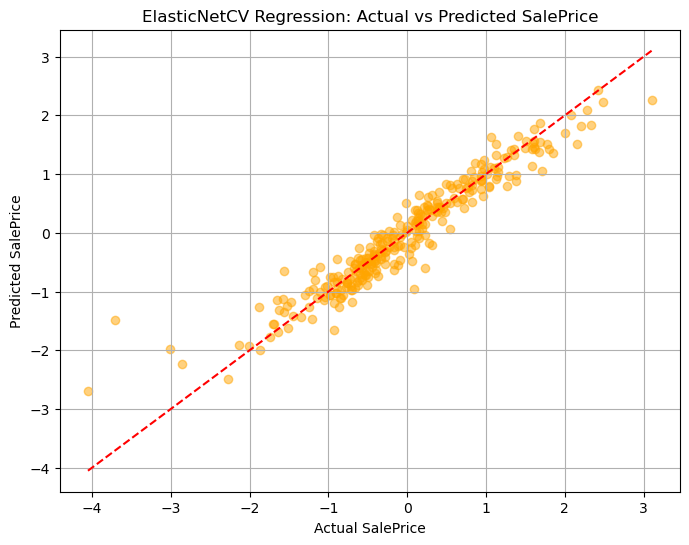

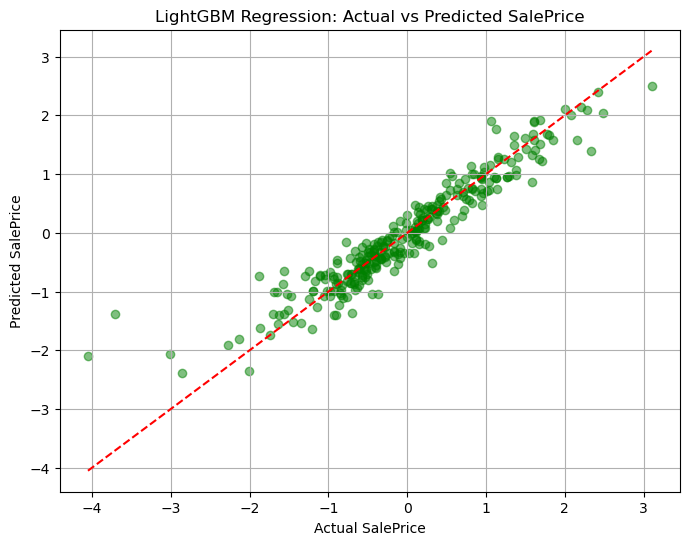

In [16]:
plt.figure(figsize=(8, 6))
plt.scatter(y_val, y_val_pred_elasticnetcv, color='orange', alpha=0.5)
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red', linestyle='--')
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("ElasticNetCV Regression: Actual vs Predicted SalePrice")
plt.grid(True)
plt.show()

# LightGBM 모델의 실제 값과 예측 값을 시각화
plt.figure(figsize=(8, 6))
plt.scatter(y_val, y_val_pred_lgbm, color='green', alpha=0.5)
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red', linestyle='--')
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("LightGBM Regression: Actual vs Predicted SalePrice")
plt.grid(True)
plt.show()

In [11]:
import numpy as np

In [17]:
#simple average

In [39]:
from scipy.special import inv_boxcox1p

# Train 데이터셋과 테스트 데이터셋의 피처 정렬 및 일치 처리
X_train_features = X_train.columns
test_df_adjusted = test_df.drop(columns=['Id']).reindex(columns=X_train_features, fill_value=0)

# 테스트 데이터셋에 대한 예측 수행
test_ridge_preds = ridge_model.predict(test_df_adjusted)
test_lasso_preds = lasso_model.predict(test_df_adjusted)
test_xgb_preds = xgb_model.predict(test_df_adjusted)
test_elastic_preds = elasticnetcv_model.predict(test_df_adjusted)
test_lgbm_preds = lgbm_model.predict(test_df_adjusted)

# Simple Average 앙상블
simple_average = (
    0.2 * test_ridge_preds + 
    0.2 * test_lasso_preds + 
    0.2 * test_elastic_preds + 
    0.2 * test_xgb_preds + 
    0.2 * test_lgbm_preds
)

# Yeo-Johnson 변환에 사용된 lambda 값을 가져오기
lambdas = {
    'LotFrontage': 0.6946667655825296, 'LotArea': 0.2854579854911228, 'OverallQual': 0.7192432330855125, 
    'OverallCond': 0.23733005033591364, 'YearBuilt': 22.11061658680637, 'YearRemodAdd': 31.775206020135464,
    'MasVnrArea': -0.23287643489132376, 'ExterQual': -1.5974108378575134, 'ExterCond': -0.2994274886563322,
    'BsmtQual': 0.09270030415062114, 'BsmtCond': 1.2314032448160812, 'TotalBsmtSF': 0.743177392771308,
    'HeatingQC': 2.7611381596783606, 'GrLivArea': 0.039219512810829874, 'GarageCars': 1.3443867519892132,
    'GarageArea': 0.810834493579752, 'SalePrice': -0.044048042422657335  # 예시로 SalePrice에 대한 lambda 값을 포함
}

# SalePrice에 대한 lambda 값 사용
lambda_saleprice = lambdas['SalePrice']

# Yeo-Johnson 변환된 값을 원래 값으로 역변환
if lambda_saleprice != 0:
    simple_average = inv_boxcox1p(simple_average, lambda_saleprice)

# 결과 저장
submission_simple_avg = pd.DataFrame({'Id': test_df['Id'], 'SalePrice': simple_average})
submission_simple_avg.to_csv('SimpleAvg.csv', index=False)


In [40]:
#weight average

In [43]:
from scipy.special import inv_boxcox1p

# Weight Average 1 앙상블
weights = [1/mse_ridge, 1/mse_lasso, 1/mse_elasticnetcv, 1/mse_xgb, 1/mse_lgbm]
normalized_weights = [w/sum(weights) for w in weights]

weight_average1 = (
    normalized_weights[0] * test_ridge_preds + 
    normalized_weights[1] * test_lasso_preds + 
    normalized_weights[2] * test_elastic_preds + 
    normalized_weights[3] * test_xgb_preds + 
    normalized_weights[4] * test_lgbm_preds
)

# 제공된 람다 값에 따른 피처별 Yeo-Johnson 변환 역변환
lambdas = {
    'LotFrontage': 0.6946667655825296, 'LotArea': 0.2854579854911228, 'OverallQual': 0.7192432330855125, 
    'OverallCond': 0.23733005033591364, 'YearBuilt': 22.11061658680637, 'YearRemodAdd': 31.775206020135464,
    'MasVnrArea': -0.23287643489132376, 'ExterQual': -1.5974108378575134, 'ExterCond': -0.2994274886563322,
    'BsmtQual': 0.09270030415062114, 'BsmtCond': 1.2314032448160812, 'TotalBsmtSF': 0.743177392771308,
    'HeatingQC': 2.7611381596783606, 'GrLivArea': 0.039219512810829874, 'GarageCars': 1.3443867519892132,
    'GarageArea': 0.810834493579752, 'SalePrice': -0.044048042422657335  # 예시로 SalePrice에 대한 lambda 값을 포함
}

# SalePrice에 대한 lambda 값을 사용하여 Yeo-Johnson 변환 역변환
lambda_saleprice = lambdas['SalePrice']

# Yeo-Johnson 변환은 Box-Cox와 유사하므로, 역변환에는 inv_boxcox1p를 사용 (lambda 값이 -1일 때 사용)
if lambda_saleprice != 0:
    weight_average1 = inv_boxcox1p(weight_average1, lambda_saleprice)

# 결과 저장
submission_weight_avg1 = pd.DataFrame({'Id': test_df['Id'], 'SalePrice': weight_average1})
submission_weight_avg1.to_csv('WeightAvg1.csv', index=False)
